In [3]:
import os
import sys
sys.path.append(os.path.abspath('../../..')) 
from plotting_utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

%matplotlib inline
set_matplotlib_style()

In [4]:
data_path = '../../discrete-mbrl-model-free_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['x_pos'] = df['x_pos'].astype(int)
df['y_pos'] = df['y_pos'].astype(int)
df


,y_pos,x_pos,carry_key,door_unlocked,episode
_step,,,,,
0,6,3,False,False,0
1,6,3,False,False,0
2,6,3,False,False,0
3,6,3,False,False,0
4,6,3,False,False,0
...,...,...,...,...,...
101591,2,3,True,False,106
101592,2,3,True,False,106
101593,2,3,True,False,106


In [5]:
df_nkey_ndoor = df[~df["door_unlocked"]  & ~df["carry_key"]]
df_nkey_ndoor 

,y_pos,x_pos,carry_key,door_unlocked,episode
_step,,,,,
0,6,3,False,False,0
1,6,3,False,False,0
2,6,3,False,False,0
3,6,3,False,False,0
4,6,3,False,False,0
...,...,...,...,...,...
101526,4,3,False,False,106
101527,4,3,False,False,106
101528,3,3,False,False,106


In [24]:
df_key_ndoor = df[~df["door_unlocked"]  & df["carry_key"]]
df_key_ndoor 

,y_pos,x_pos,carry_key,door_unlocked,episode
_step,,,,,
48,3,3,True,False,0
49,2,3,True,False,0
50,2,3,True,False,0
51,2,3,True,False,0
52,2,3,True,False,0
...,...,...,...,...,...
101591,2,3,True,False,106
101592,2,3,True,False,106
101593,2,3,True,False,106


In [25]:
df_nkey_door = df[df["door_unlocked"]  & ~df["carry_key"]]
df_nkey_door 

,y_pos,x_pos,carry_key,door_unlocked,episode
_step,,,,,


In [26]:
df_key_door = df[df["door_unlocked"]  & df["carry_key"]]
df_key_door 

,y_pos,x_pos,carry_key,door_unlocked,episode
_step,,,,,
1501,4,3,True,True,1
1502,4,3,True,True,1
1503,4,3,True,True,1
1504,4,2,True,True,1
1505,4,2,True,True,1
...,...,...,...,...,...
99300,2,1,True,True,103
99301,2,1,True,True,103
99302,2,1,True,True,103


In [45]:
grouped = df.groupby(['carry_key', 'door_unlocked'])
grouped = [df_nkey_ndoor, df_key_ndoor, df_key_door, df_nkey_door]

In [57]:
x = df['x_pos']
y = df['y_pos']
heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
heatmap = heatmap.T
max_count = np.max(heatmap)


28253
55319
16524
0


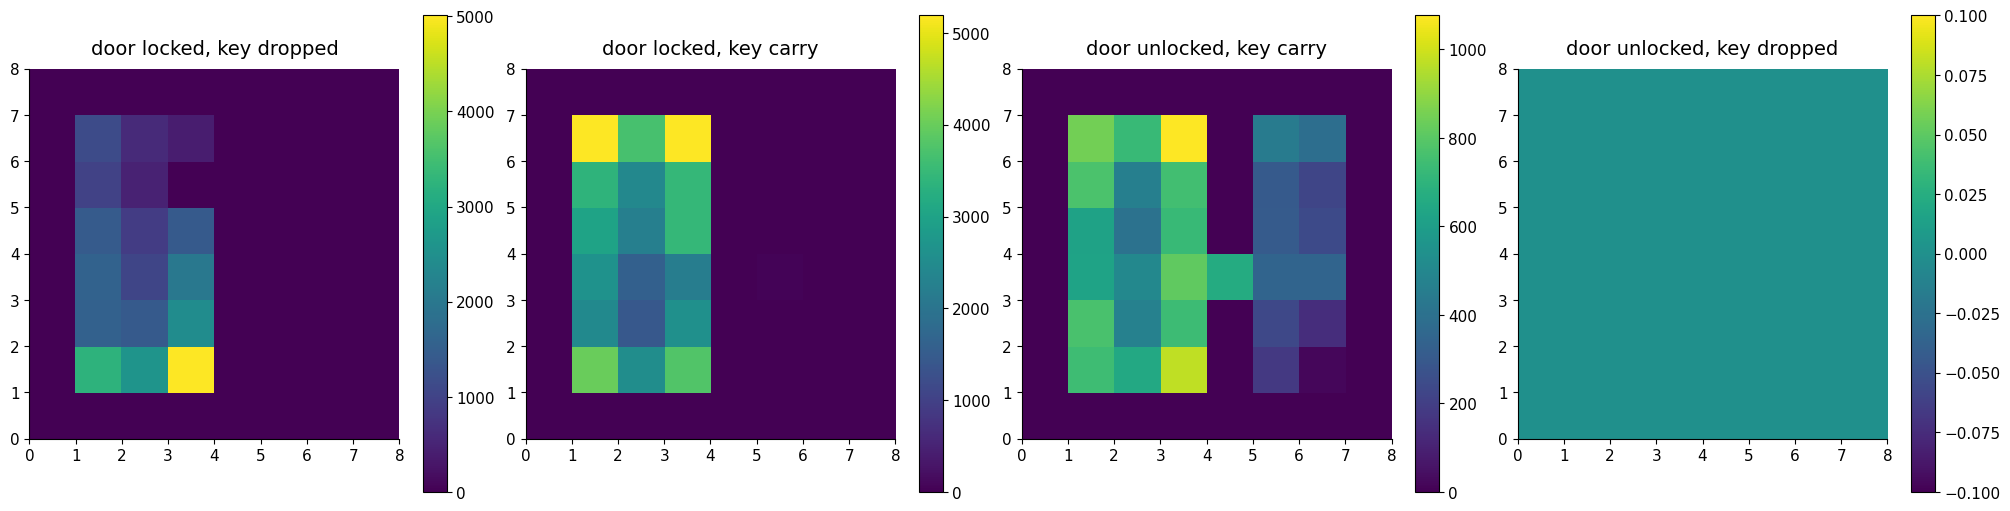

In [61]:
i = 0
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry", "door unlocked, key dropped"]

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    print(len(group))
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    h = axes[i].imshow(heatmap.T, interpolation='nearest', origin='lower',
        extent=[0, 8, 0, 8])
    
    axes[i].set_title(titles[i])    
    fig.colorbar(h, ax=axes[i])

    i += 1



    # the actual x-axis and y-axis are from 0 to 19
    # we want to put 11 ticks on the axis
    # ax.set_xticks(np.linspace(0,7, 8))
    # ax.set_yticks(np.linspace(0,7, 8))

plt.show()


# Show the plot